In [ ]:
#we will bne using open cv  for creating this project. will use haar cascade for identifying the vechical and counting it.we will be using car.xml haar cascade and bus front.xml haar cascade

In [ ]:
from  PIL import Image
import cv2
import numpy as np
import requests

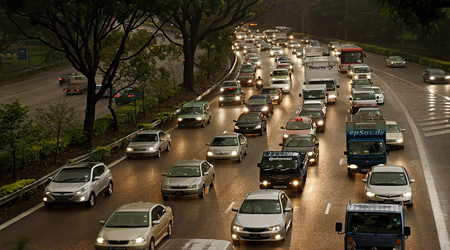

In [ ]:
#reading the image and download it
image=Image.open('/content/2560px-Driving_Cars_in_a_Traffic_Jam.jpg')
image=image.resize((450,250),Image.Resampling.LANCZOS)
image_arr= np.array(image)
image

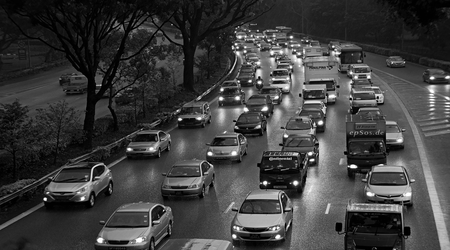

In [ ]:
grey_image=cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey_image)

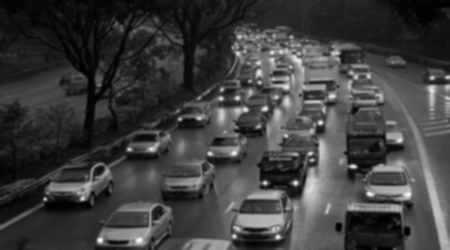

In [ ]:
blur=cv2.GaussianBlur(grey_image,(5,5),0)
Image.fromarray(blur)

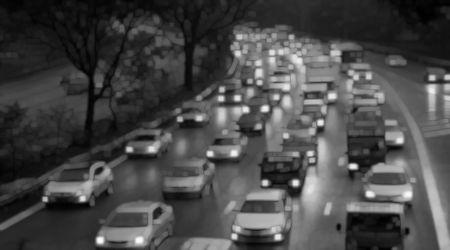

In [ ]:
dilated=cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

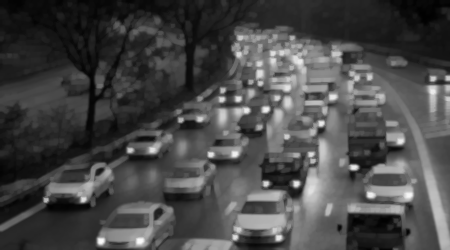

In [ ]:
kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
closing= cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernel1)
opening=cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel2)
Image.fromarray(closing)

In [ ]:
car_cascade_file='cars.xml'
cars_cascade= cv2.CascadeClassifier(car_cascade_file)
cars= cars_cascade.detectMultiScale(blur,1.1,1)

5 cars found


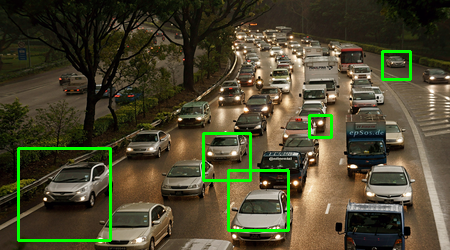

In [ ]:
count=0
for(x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(0,255,0),2)
  count+=1
print(count,"cars found")
Image.fromarray(image_arr)


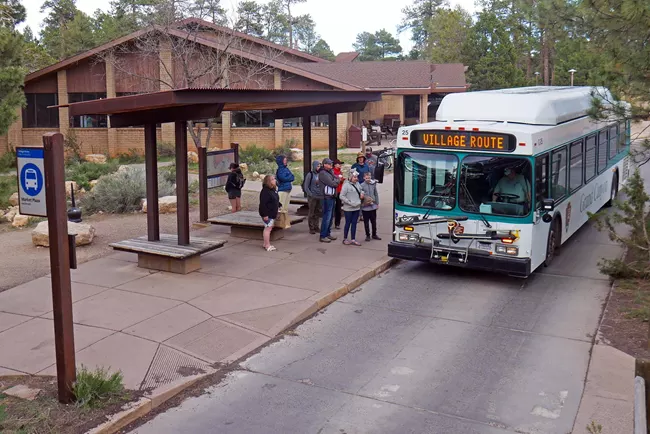

In [ ]:
image2=Image.open('/content/P1490311-copy.webp')
image2

array([[ 82,  88,  97, ...,  92,  85,  83],
       [128, 124, 187, ..., 111,  93,  81],
       [133, 127, 189, ...,  96,  88,  89],
       ...,
       [ 45,  54,  85, ..., 110,  34,  37],
       [ 81, 106, 115, ..., 112,  30,  27],
       [106, 106,  90, ..., 118,  32,  30]], dtype=uint8)
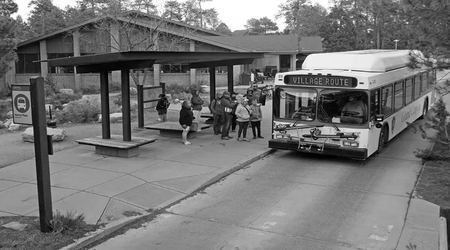

In [ ]:
image2=image2.resize((450,250),Image.Resampling.LANCZOS)
image2_arr=np.array(image2)
image2_grey=cv2.cvtColor(image2_arr,cv2.COLOR_BGR2GRAY)
image2_grey

In [ ]:
bas_cascade_file='Bus_front.xml'
bus_cascade= cv2.CascadeClassifier(bas_cascade_file)
bus= bus_cascade.detectMultiScale(image2_grey,1.1,1)

0 bus found


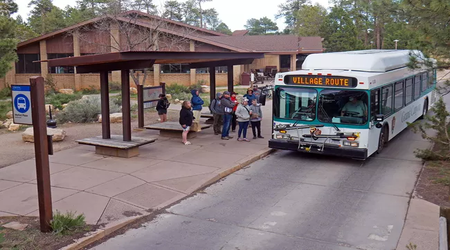

In [ ]:
count=0
for(x,y,w,h) in bus:
  cv2.rectangle(image2_arr,(x,y),(x+w,y+h),(0,255,0),2)
  count+=1
print(count,"bus found")
Image.fromarray(image2_arr)

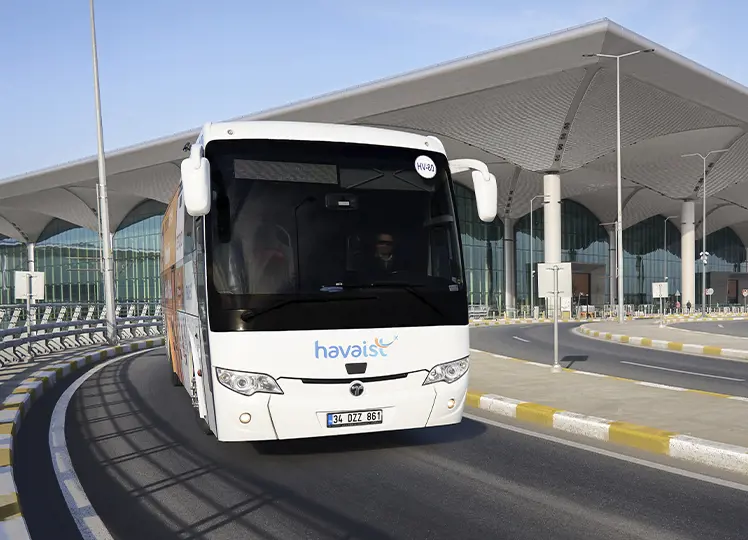

In [ ]:
image3=Image.open('/content/havaist_748x540-1.webp')
image3

array([[181, 181, 181, ..., 198, 198, 198],
       [181, 181, 181, ..., 199, 199, 199],
       [181, 181, 181, ..., 199, 199, 199],
       ...,
       [149, 148, 148, ...,  65,  66,  66],
       [148, 148, 147, ...,  66,  67,  67],
       [148, 148, 147, ...,  68,  65,  63]], dtype=uint8)
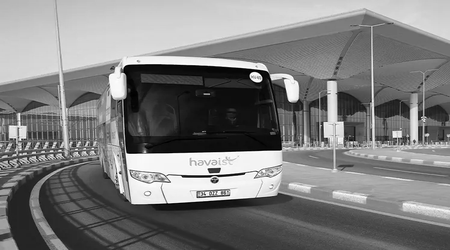

In [ ]:
image3=image3.resize((450,250),Image.Resampling.LANCZOS)
image3_arr=np.array(image3)
image3_grey=cv2.cvtColor(image3_arr,cv2.COLOR_BGR2GRAY)
image3_grey

In [ ]:
bas_cascade_file='Bus_front.xml'
bus_cascade= cv2.CascadeClassifier(bas_cascade_file)
bus= bus_cascade.detectMultiScale(image3_grey,1.1,1)


1 bus found


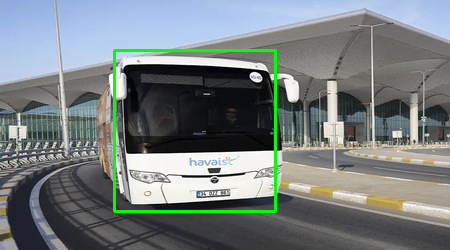

In [ ]:
count=0
for(x,y,w,h) in bus:
  cv2.rectangle(image3_arr,(x,y),(x+w,y+h),(0,255,0),2)
  count+=1
print(count,"bus found")
Image.fromarray(image3_arr)

In [ ]:
cars_mp4_file_cascade='cars.xml'
cars_mp4_file='/content/2053100-uhd_3840_2160_30fps.mp4'
cap_video=cv2.VideoCapture(cars_mp4_file)
car_cascade=cv2.CascadeClassifier(cars_mp4_file_cascade)
car_video=cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'mp4v'),20,(640,480))

In [ ]:
while True:
  ret, image=cap_video.read()
  if(type(image))==type(None):
    break

  image_grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  cars=car_cascade.detectMultiScale(image_grey,1.1,1)
  for (x,y,w,h) in cars:
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
      car_video.write(image)
  car_video.release()